# ML Week 8 Assignment 

Stan Lyubarskiy

## Instructions

1. Download the housing dataset referenced in the textbook on page 279, https://archive.ics.uci.edu/ml/machine-learning-databases/housing/

2. Pick a number of features that you think may be correlated and plot pairs of them to confirm that they are correlated.

3. Pick one feature that you think can be predicted by the other features in the dataset. The feature to be predicted needs to have numerical values.

4. Separate the data into training, validation, and test sets.

5. Apply the following Scikit Learn regression methods to the data.

- Linear Regression
- Ridge Regression
- Lasso Regression
- Elastic Net
- Decision Tree Regression

6. Quantify how good a job each method did in predicting the value of the dependent variable (using your test data set). Discuss why you believe each method performed as it did.

7. Repeat steps 3. to 6. for a second feature.

8. Upload your .ipynb file to Brightspace. Include your discussions (Step 6.) in either a Word or pdf file or (preferably) in a cell (or cells) in your notebook with your code.

# Description of the Data

1. Title: Boston Housing Data


2. Sources:
   (a) Origin:  This dataset was taken from the StatLib library which is
                maintained at Carnegie Mellon University.
   (b) Creator:  Harrison, D. and Rubinfeld, D.L. 'Hedonic prices and the 
                 demand for clean air', J. Environ. Economics & Management,
                 vol.5, 81-102, 1978.
   (c) Date: July 7, 1993


3. Past Usage:
   -   Used in Belsley, Kuh & Welsch, 'Regression diagnostics ...', Wiley, 
       1980.   N.B. Various transformations are used in the table on
       pages 244-261.
    -  Quinlan,R. (1993). Combining Instance-Based and Model-Based Learning.
       In Proceedings on the Tenth International Conference of Machine 
       Learning, 236-243, University of Massachusetts, Amherst. Morgan
       Kaufmann.


4. Relevant Information:Concerns housing values in suburbs of Boston.


5. Number of Instances: 506


6. Number of Attributes: 13 continuous attributes (including "class" attribute "MEDV"), 1 binary-valued attribute.


7. Attribute Information:

    1. CRIM      per capita crime rate by town
    2. ZN        proportion of residential land zoned for lots over 25,000 sq.ft.
    3. INDUS     proportion of non-retail business acres per town
    4. CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
    5. NOX       nitric oxides concentration (parts per 10 million)
    6. RM        average number of rooms per dwelling
    7. AGE       proportion of owner-occupied units built prior to 1940
    8. DIS       weighted distances to five Boston employment centres
    9. RAD       index of accessibility to radial highways
    10. TAX      full-value property-tax rate per 10,000 dollars
    11. PTRATIO  pupil-teacher ratio by town
    12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
    13. LSTAT    % lower status of the population
    14. MEDV     Median value of owner-occupied homes in 1000's


8. Missing Attribute Values:  None.

# Introduction

In this assignment, we will analyze the famous Boston Housing Dataset. Instead of classifications, we will use regressions to predict certain variables by the features in the dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet

In [2]:
# save the column names

names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [3]:
# importing the dateset

df = pd.read_csv("housing.data",header=None, encoding='utf-8', names=names, delim_whitespace=True)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Glancing at the descriptive statistics, it looks like certain data points have a much larger distribution and variance. This means we will need to scale the data.

In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


We can see that most of the features have a very large variance so it will be easiest to scale the entire dataset.

In [7]:
# find features with a large variance so they can be scaled
pd.options.display.float_format = '{:.5f}'.format
variance = pd.DataFrame(df.var(), columns=["Variance"])
variance.sort_values(by="Variance",ascending=False,inplace=True)
variance

,Variance
TAX,28404.75949
B,8334.75226
AGE,792.35840
ZN,543.93681
MEDV,84.58672
RAD,75.81637
CRIM,73.98658
LSTAT,50.99476
INDUS,47.06444
PTRATIO,4.68699


### Correlation Analysis

Before we scale the data, let's check the correlation between all the features. The correlation values range from -1 to 1 with 1 being a perfect correlation so the two features move in exactly the same direction which is up. The same applies for -1 except the relationship would be inverted meaning when one goes up, the other goes down. For our purposes, we will isolate 0.6+ or negative 0.6 or lower as the cutoff for a strong correlation between two features.

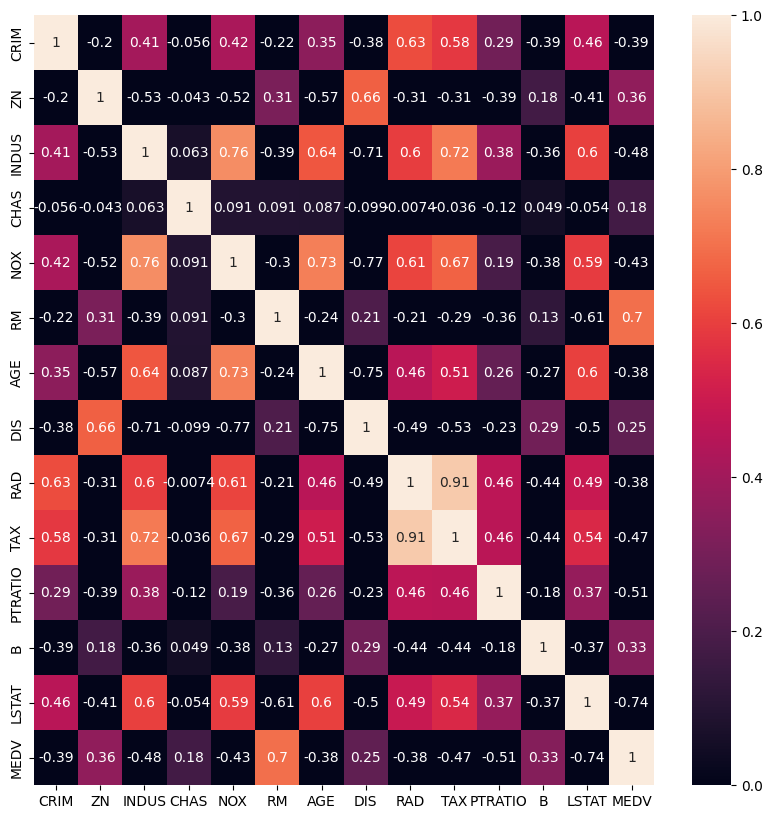

In [8]:
# create a heatmap to view the correlation pairs
from seaborn import heatmap

plt.figure(figsize=(10,10))
heatmap(df.corr(), vmin=0, vmax=1, annot=True, color='Red')
plt.show()

We can see that RAD and TAX are extremely correlated. The others are less correlated but still high enough to pay attention to.

In [9]:
correlation = df.corr()

# Use the symmetry of the correlation matrix to split the data
corr_sym = correlation.where(~np.tril(np.ones(correlation.shape)).astype(bool))

# filter out data that has an absolute correlation less than 0.6
corr_sym = corr_sym.stack()
corr_filter = corr_sym[abs(corr_sym) >= 0.6]
corr_filter

CRIM   RAD      0.62551
ZN     DIS      0.66441
INDUS  NOX      0.76365
       AGE      0.64478
       DIS     -0.70803
       TAX      0.72076
       LSTAT    0.60380
NOX    AGE      0.73147
       DIS     -0.76923
       RAD      0.61144
       TAX      0.66802
RM     LSTAT   -0.61381
       MEDV     0.69536
AGE    DIS     -0.74788
       LSTAT    0.60234
RAD    TAX      0.91023
LSTAT  MEDV    -0.73766
dtype: float64

### Regression Analysis

Here we will begin preparing our dataset for regression analysis. For the first iteration, we will choose MEDV (Median value of owner-occupied homes in 1000's) as the target variable. We will use all the other 13 features to predict this value.

In [10]:
# make a copy of the original dataset for manipulation
df2 = df.copy()

In [11]:
# check the copy
df2

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.00000,2.31000,0,0.53800,6.57500,65.20000,4.09000,1,296.00000,15.30000,396.90000,4.98000,24.00000
1,0.02731,0.00000,7.07000,0,0.46900,6.42100,78.90000,4.96710,2,242.00000,17.80000,396.90000,9.14000,21.60000
2,0.02729,0.00000,7.07000,0,0.46900,7.18500,61.10000,4.96710,2,242.00000,17.80000,392.83000,4.03000,34.70000
3,0.03237,0.00000,2.18000,0,0.45800,6.99800,45.80000,6.06220,3,222.00000,18.70000,394.63000,2.94000,33.40000
4,0.06905,0.00000,2.18000,0,0.45800,7.14700,54.20000,6.06220,3,222.00000,18.70000,396.90000,5.33000,36.20000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.00000,11.93000,0,0.57300,6.59300,69.10000,2.47860,1,273.00000,21.00000,391.99000,9.67000,22.40000
502,0.04527,0.00000,11.93000,0,0.57300,6.12000,76.70000,2.28750,1,273.00000,21.00000,396.90000,9.08000,20.60000
503,0.06076,0.00000,11.93000,0,0.57300,6.97600,91.00000,2.16750,1,273.00000,21.00000,396.90000,5.64000,23.90000
504,0.10959,0.00000,11.93000,0,0.57300,6.79400,89.30000,2.38890,1,273.00000,21.00000,393.45000,6.48000,22.00000


In [12]:
# Creating a scaler object
scaler = StandardScaler() 

# Fitting and transforming the original data to scaled data
scale_features = df2.iloc[:,df2.columns!="MEDV"].values
df2.iloc[:,df2.columns!="MEDV"] = scaler.fit_transform(scale_features)

In [13]:
# check the new distribution after scaling
df2.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000,506.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,22.53281
std,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,1.00099,9.19710
min,-0.41978,-0.48772,-1.55784,-0.27260,-1.46588,-3.88025,-2.33544,-1.26707,-0.98284,-1.31399,-2.70738,-3.90719,-1.53113,5.00000
25%,-0.41097,-0.48772,-0.86769,-0.27260,-0.91303,-0.56863,-0.83745,-0.80569,-0.63796,-0.76758,-0.48804,0.20507,-0.79942,17.02500
50%,-0.39067,-0.48772,-0.21110,-0.27260,-0.14422,-0.10847,0.31738,-0.27932,-0.52300,-0.46467,0.27486,0.38119,-0.18125,21.20000
75%,0.00740,0.04877,1.01600,-0.27260,0.59868,0.48277,0.90680,0.66237,1.66125,1.53093,0.80658,0.43365,0.60302,25.00000
max,9.93393,3.80423,2.42257,3.66840,2.73235,3.55504,1.11749,3.96052,1.66125,1.79819,1.63883,0.44105,3.54877,50.00000


In [14]:
y = df2["MEDV"]
X = df2.iloc[:,df2.columns!="MEDV"]

In [15]:
print("Shape of y:",y.shape, "Shape of X", X.shape)

Shape of y: (506,) Shape of X (506, 13)


In [16]:
# split the data into training, testing, and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

In [20]:
print("X Train", X_train.shape, "Y Train", y_train.shape)
print("X Test", X_test.shape, "Y Test", y_test.shape)
print("X Val", X_val.shape, "Y Val", y_val.shape)

X Train (303, 13) Y Train (303,)
X Test (102, 13) Y Test (102,)
X Val (101, 13) Y Val (101,)


### Linear Regression

We will start with linear regressions.

In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [101]:
# let's test the model by measuring our accuracy scores (r-squared) on the training and validation sets
print("Training R-Squared Score", lin_reg.score(X_train, y_train))
print("Validation R-Squared Score", lin_reg.score(X_val, y_val))

Training R-Squared Score 0.758825971676613
Validation R-Squared Score 0.7151087447954624


The R-squared score is very low for both training and validation samples. We can look at the coefficients to understand which features might be weighted improperly. Alternatively, it is possible that this target variable does not have a linear relationship with the features.

In [24]:
# save the feature names for plotting
feature_names = X_train.columns

In [41]:
lin_coeff = {}
for i in range(0, len(feature_names)):
    lin_coeff[feature_names[i]] = abs(lin_reg.coef_)[i]

In [42]:
lin_coeff

{'CRIM': 0.8373869309908893,
 'ZN': 0.7905860393841111,
 'INDUS': 0.3276082298320713,
 'CHAS': 0.774869401643323,
 'NOX': 2.199010413444262,
 'RM': 3.3473405857694325,
 'AGE': 0.046361038334892135,
 'DIS': 3.2441773229237114,
 'RAD': 1.7768337590711243,
 'TAX': 1.5039484030605652,
 'PTRATIO': 1.9338981342602835,
 'B': 1.2506312603869663,
 'LSTAT': 3.4148704523340987}

We see that LSTAT, DIS, and RM have the hightest weights for the linear model. We know from our correlation matrix that RM and LSTAT are most highly correlated with our target variable. Let us try training a linear model on just those two features.

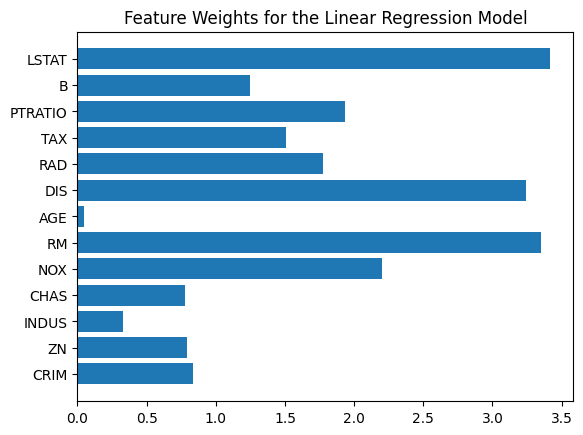

In [88]:
# graph the feature weights

names = list(lin_coeff.keys())
values = list(lin_coeff.values())

plt.barh(range(len(lin_coeff)), values, tick_label=names)
plt.title("Feature Weights for the Linear Regression Model")
plt.show()

After training the model on just two features, we see that it performs even worse than the original model with all features. Therefore, we can conclude that these two features are not great predictors of the target variable on their own.

In [102]:
lin_reg2 = LinearRegression()
lin_reg2.fit(X_train[["LSTAT","RM"]], y_train)

LinearRegression()

In [103]:
# let's test the model by measuring our accuracy scores (r-squared) on the training and validation sets
print("Training R-Squared Score", lin_reg2.score(X_train[["LSTAT","RM"]], y_train))
print("Validation R-Squared Score", lin_reg2.score(X_val[["LSTAT","RM"]], y_val))

Training R-Squared Score 0.6535302594878001
Validation R-Squared Score 0.6376982416709496


Let us look at the R-Squared scores for the two models against the test set to see if there is any difference.

In [105]:
print("Linear Model 1 R-Squared Score for Testing", lin_reg.score(X_test, y_test))
print("Linear Model 2 R-Squared Score for Testing", lin_reg2.score(X_test[["LSTAT","RM"]], y_test))

Linear Model 1 R-Squared Score for Testing 0.6550300675058267
Linear Model 2 R-Squared Score for Testing 0.571408192605335


We see here that the first model with all features is superior to the second with only two important features. Nonetheless, both models perform relatively poorly. 

Now let us take a look at how the predictions for the first model compare to the actual values.

In [106]:
y_pred = lin_reg.predict(X_test)

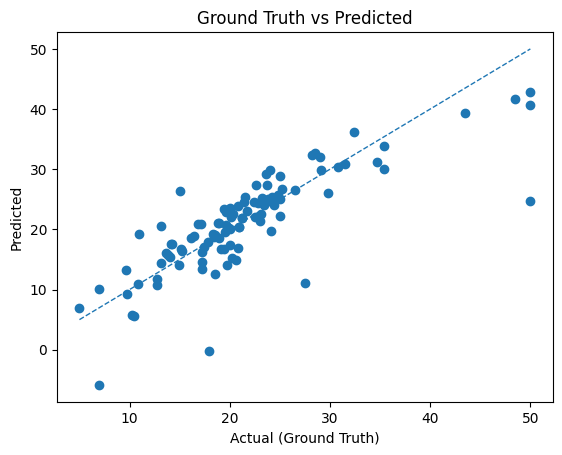

In [107]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted")
plt.show()

We can clearly see from the above graph that the model misses a lot of the points. There appear to be a lot of errors which we will verify by looking at the mean squared error and mean absolute error. The relationship between the target and the features does not look linear at all.

In [124]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print("\n","\033[1mR-Squared:\033[0m", r2,"\n", 
      "\033[1mMean Squared Error:\033[0m", mse,"\n", 
      "\033[1mMean Absolute Error:\033[0m", mae)


 R-Squared: 0.6550300675058267 
 Mean Squared Error: 25.29795022635895 
 Mean Absolute Error: 3.2805825868345795


### Ridge, Lasso, Elastic Net Regressions

Now that we know that the linear model is a poor predictor of our target variable, let us look at ridge, lasso, and elastic net regression.

In [205]:
import re

In [228]:
# create a function to compute the different regressions
def run_reg(regressor, random_state, alpha, x, y,x_test):
    # create a regression object and fit it
    model = regressor
    model.random_state=random_state
    model.alpha=alpha
    model.fit(x, y)
    y_pred = model.predict(x_test)
    
    # print the R-Squared scores and the errors
    reg_name = re.sub(r'\(.*\)', '', str(model))
    print(f"\033[1m{reg_name} Regression with Alpha Value of {model.alpha}\033[0m")
    training_score = f"Training R-Squared Score:"
    validation_score = f"Validation R-Squared Score:"
    test_score = f"Testing R-Squared Score:"
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(training_score, model.score(X_train, y_train)*100)
    print(validation_score, model.score(X_val, y_val)*100)
    print(test_score, model.score(X_test, y_test)*100)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("----------------------------------------------")

In [373]:
alpha_values = [0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]

In [374]:
regressions = [Ridge(), Lasso(), ElasticNet()]

In [375]:
for i in alpha_values:
    for r in regressions:
        run_reg(r,42,i,X_train, y_train, X_test)

Ridge Regression with Alpha Value of 0.001
Training R-Squared Score: 75.88259716535653
Validation R-Squared Score: 71.51087152388965
Testing R-Squared Score: 65.5029803193566
Mean Squared Error: 25.297969609376963
Mean Absolute Error: 3.280578623229284
----------------------------------------------
Lasso Regression with Alpha Value of 0.001
Training R-Squared Score: 75.88251903860626
Validation R-Squared Score: 71.51012108953853
Testing R-Squared Score: 65.49244736088099
Mean Squared Error: 25.305693826305834
Mean Absolute Error: 3.280518928135408
----------------------------------------------
ElasticNet Regression with Alpha Value of 0.001
Training R-Squared Score: 75.882467774793
Validation R-Squared Score: 71.51001709185999
Testing R-Squared Score: 65.4937695343942
Mean Squared Error: 25.304724226448652
Mean Absolute Error: 3.2799442452418117
----------------------------------------------
Ridge Regression with Alpha Value of 0.01
Training R-Squared Score: 75.88259693731808
Validatio

### Observation

We attempted to fit and test ridge, lasso, and elastic net models at different alpha values using our run_reg function. The R-squared scores were fairly consistent between the different regressions at each alpha score. This likely implies that the target variable that we chose cannot be reliably predicted by the other features. We also see high mean and absolute error values.

Let us see how a decision tree regression performs.

### Decision Tree Regression

In [376]:
dtr = DecisionTreeRegressor(random_state=42)

dtr.fit(X_train,y_train)

DecisionTreeRegressor(random_state=42)

In [377]:
# let's test the model by measuring our accuracy scores (r-squared) on the training and validation sets
print("Training R-Squared Score:", dtr.score(X_train, y_train))
print("Validation R-Squared Score:", dtr.score(X_val, y_val))
print("Max Depth Reached:", dtr.get_depth())

Training R-Squared Score: 1.0
Validation R-Squared Score: 0.7821220632208725
Max Depth Reached: 18


Without specifying a max depth for our tree, it appears that it is overfitting. It has a perfect training r-squared score, but the validation score is much lower. We can tune the hyperparameters by specifiying a max depth that is lower than the 18 that it ended up reaching.

In [378]:
dtr = DecisionTreeRegressor(random_state=42, max_depth=10)

dtr.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=10, random_state=42)

In [379]:
print("Training R-Squared Score:", dtr.score(X_train, y_train))
print("Validation R-Squared Score:", dtr.score(X_val, y_val))

Training R-Squared Score: 0.9931046571597445
Validation R-Squared Score: 0.6392159512569177


Prematurely cutting off the max depth for the tree actually resulted in a lower R-squared score. However, we can also try adjusting the alpha parameter for the tree. We will use the same alpha values that we used for the above regressions to see if the score can improve.

In [380]:
for i in alpha_values:
    dtr = DecisionTreeRegressor(random_state=42, ccp_alpha=i)
    dtr.fit(X_train,y_train)
    
    y_pred = dtr.predict(X_test)
    
    # print the R-Squared scores and the errors
    print(f"\033[1mDecision Tree Regression with Alpha Value of {dtr.ccp_alpha}\033[0m")
    training_score = f"Training R-Squared Score:"
    validation_score = f"Validation R-Squared Score:"
    test_score = f"Testing R-Squared Score:"
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(training_score, dtr.score(X_train, y_train)*100)
    print(validation_score, dtr.score(X_val, y_val)*100)
    print(test_score, dtr.score(X_test, y_test)*100)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("Max Depth Reached:", dtr.get_depth())
    print("----------------------------------------------")

Decision Tree Regression with Alpha Value of 0.001
Training R-Squared Score: 99.98014020961368
Validation R-Squared Score: 78.40415197959717
Testing R-Squared Score: 63.83639710993349
Mean Squared Error: 26.52013812636166
Mean Absolute Error: 2.9678431372549023
Max Depth Reached: 18
----------------------------------------------
Decision Tree Regression with Alpha Value of 0.01
Training R-Squared Score: 99.61901158800592
Validation R-Squared Score: 79.43110580161353
Testing R-Squared Score: 64.40572277119632
Mean Squared Error: 26.102630080455096
Mean Absolute Error: 2.9748090390002155
Max Depth Reached: 17
----------------------------------------------
Decision Tree Regression with Alpha Value of 0.1
Training R-Squared Score: 96.58362898584532
Validation R-Squared Score: 79.05107007948372
Testing R-Squared Score: 66.3705074355841
Mean Squared Error: 24.66177915510569
Mean Absolute Error: 2.7985982757340273
Max Depth Reached: 9
----------------------------------------------
Decision Tr

Interestingly, when we increased the alpha value to 1, we reached the highest testing accuracy for all the models so far. The tree only grew to a max depth of four. However, it also had one of the lowest mean errors so far. Let us try graphing the predictions against the true values.

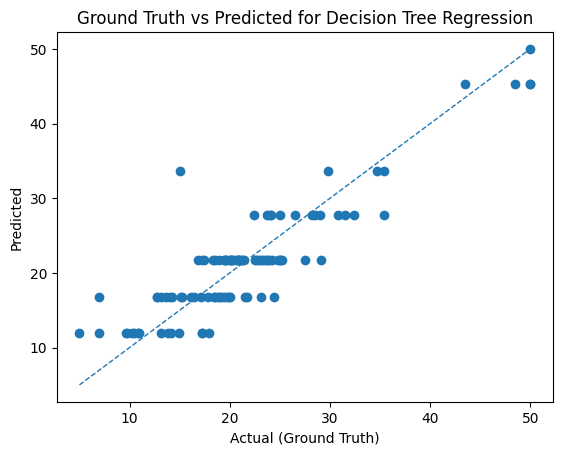

In [381]:
# graph the highest scoring tree's predictions

dtr = DecisionTreeRegressor(random_state=42, ccp_alpha=1)
dtr.fit(X_train,y_train)
    
y_pred = dtr.predict(X_test)


fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted for Decision Tree Regression")
plt.show()

In [382]:
dtr_pred = pd.DataFrame({'Actual MEDV': y_test, 'Predicted MEDV': y_pred[:len(y_test)]})
dtr_pred.head(20)

,Actual MEDV,Predicted MEDV
173,23.60000,21.70339
274,32.40000,27.73429
491,13.60000,16.71250
72,22.80000,21.70339
452,16.10000,16.71250
76,20.00000,21.70339
316,17.80000,16.71250
140,14.00000,16.71250
471,19.60000,21.70339
500,16.80000,21.70339


### Observation

We see that while most of the points are not on the line, we do see that the line does seem to separate the values better than the linear regression did. Looking at 20 of the predictions matched against the actual values, we see that there are errors for each comparison but they are not as high as they were for the other regressions.

Here we create a dataframe to analyze which features the decision tree found most important. From the results, we find RM and LSTAT which are the most highly correlated with MEDV. These have the highest weights while CRIM and DIS have the remaining weights. No other features were considered.

In [383]:
# create a dataframe for the most important features and sort it
dtr_features = pd.DataFrame(data=[dtr.feature_importances_],columns=feature_names)
dtr_features = dtr_features.T
dtr_features.sort_values(by=0,ascending=False,inplace=True)
dtr_features

,0
RM,0.68784
LSTAT,0.20509
CRIM,0.05957
DIS,0.04749
ZN,0.00000
INDUS,0.00000
CHAS,0.00000
NOX,0.00000
AGE,0.00000
RAD,0.00000


### Observation

We have completed our analysis using different regressions to predict the median home value for the Boston dataset. Despite trying different regression models and tuning the hyperparameters, we never reach a very high R-squared score. This makes sense because none of the features are particularly highly correlated with MEDV aside from RM and LSTAT. Even then, the correlation metric for those two is still in the 0.7 range. It is likely that the other features cannot predict MEDV well. As the alpha value moved closer to 0, the results were similar or identical to the linear regression. As we increased the alpha values, the results varied.

The ridge regression tries to address the problems of the linear regression by adding an L2 regularization penalty term. It works well with datasets that have a lot of features. On the other hand, the lasso regression works better with less features and when features have coefficients close to zero. Lasso eliminates those features by applying L1 regularization. However, this is problematic if there is multicollinearity between the features. Elastic net has the ability to apply either L1 or L2 regularization depending on the alpha value. If alpha is 0.5, then elastic net is able to use a mix of both L1 and L2 regularization. In our case, none of these models were able to predict our target variable well.

The decision tree regression performed best. This is likely because it was able to prune irrelevant features.

# Second Target variable

Let us select a second variable to try and predict.

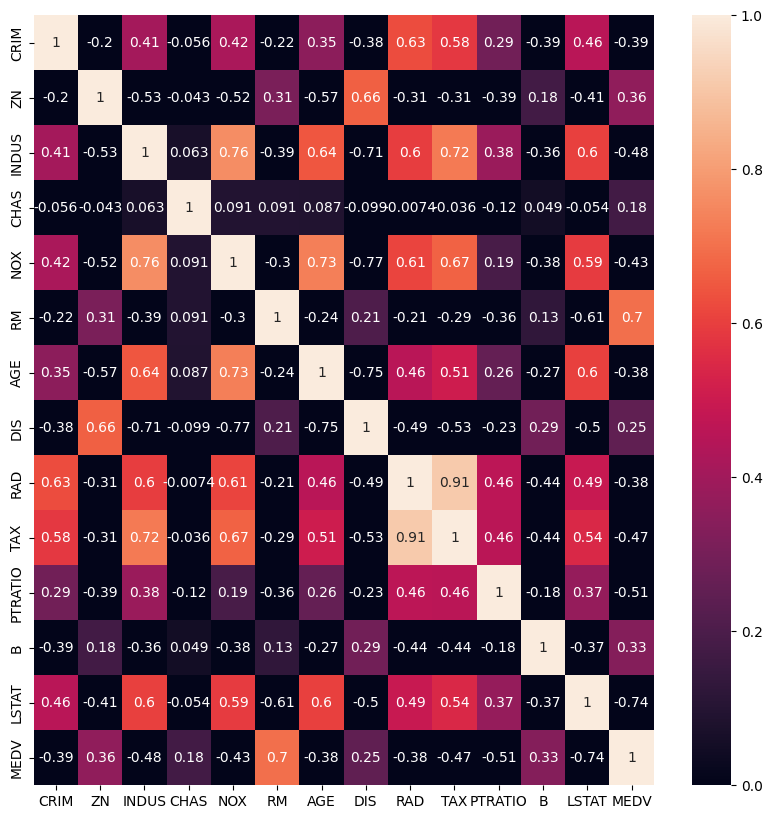

In [358]:
# review the correlation heatmap again

plt.figure(figsize=(10,10))
heatmap(df.corr(), vmin=0, vmax=1, annot=True, color='Red')
plt.show()

This time we will choose TAX as the target variable. It is tied for the highest mean correlation and has the highest median correlation. This implies that several features may be good predictors for this target.

In [372]:
# look at the mean and median correlations
print("Mean Correlation\n",df.corr().mean(),"\n")
print("Median Correlation\n",df.corr().median())

Mean Correlation
 CRIM       0.17896
ZN        -0.05585
INDUS      0.19333
CHAS       0.08141
NOX        0.19080
RM        -0.01376
AGE        0.17383
DIS       -0.14653
RAD        0.23585
TAX        0.23615
PTRATIO    0.11692
B         -0.06057
LSTAT      0.14128
MEDV      -0.06839
dtype: float64 

Median Correlation
 CRIM       0.32134
ZN        -0.25621
INDUS      0.39492
CHAS       0.02071
NOX        0.30495
RM        -0.21455
AGE        0.30712
DIS       -0.30607
RAD        0.46038
TAX        0.48365
PTRATIO    0.22522
B         -0.22546
LSTAT      0.41483
MEDV      -0.37929
dtype: float64


We will eliminate features that are at or below an absolute correlation threshold of 0.5. This should allow us to focus on features that have a significant correlation threshold.

In [384]:
correlations = df.corr()['TAX'].drop('TAX')
print(correlations)

CRIM       0.58276
ZN        -0.31456
INDUS      0.72076
CHAS      -0.03559
NOX        0.66802
RM        -0.29205
AGE        0.50646
DIS       -0.53443
RAD        0.91023
PTRATIO    0.46085
B         -0.44181
LSTAT      0.54399
MEDV      -0.46854
Name: TAX, dtype: float64


In [385]:
# create a function that eliminates features below a certain correlation threshold
def get_features(correlation_threshold):
    abs_corrs = correlations.abs()
    high_correlations = abs_corrs[abs_corrs > correlation_threshold].index.values.tolist()
    return high_correlations

In [389]:
# grab features that have an absolute correlation value above 0.5
corr_features = get_features(0.5)
print(corr_features)

['CRIM', 'INDUS', 'NOX', 'AGE', 'DIS', 'RAD', 'LSTAT']


In [403]:
# select our X and Y
X2 = df[corr_features] 
y2 = df['TAX']

In [404]:
# let us scale the features
scaler2 = StandardScaler() 

# Fitting and transforming the original data to scaled data
X2.loc[:,:] = scaler.fit_transform(X2.values)

C:\Users\stanl\AppData\Local\Temp\ipykernel_15952\1377556625.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X2.loc[:,:] = scaler.fit_transform(X2.values)


In [402]:
X2

,CRIM,INDUS,NOX,AGE,DIS,RAD,LSTAT
0,-0.41978,-1.28791,-0.14422,-0.12001,0.14021,-0.98284,-1.07556
1,-0.41734,-0.59338,-0.74026,0.36717,0.55716,-0.86788,-0.49244
2,-0.41734,-0.59338,-0.74026,-0.26581,0.55716,-0.86788,-1.20873
3,-0.41675,-1.30688,-0.83528,-0.80989,1.07774,-0.75292,-1.36152
4,-0.41248,-1.30688,-0.83528,-0.51118,1.07774,-0.75292,-1.02650
...,...,...,...,...,...,...,...
501,-0.41323,0.11574,0.15812,0.01867,-0.62580,-0.98284,-0.41815
502,-0.41525,0.11574,0.15812,0.28893,-0.71664,-0.98284,-0.50085
503,-0.41345,0.11574,0.15812,0.79745,-0.77368,-0.98284,-0.98305
504,-0.40776,0.11574,0.15812,0.73700,-0.66844,-0.98284,-0.86530


In [405]:
# split the data into training, testing, and validation sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

X_train2, X_val2, y_train2, y_val2 = train_test_split(X_train2, y_train2, test_size=0.25, random_state=42) # 0.25 x 0.8 = 0.2

## Linear Regression Part 2

In [406]:
lin_reg3 = LinearRegression()
lin_reg3.fit(X_train2,y_train2)

# let's test the model by measuring our accuracy scores (r-squared) on the training and validation sets
print("Training R-Squared Score", lin_reg3.score(X_train2, y_train2))
print("Validation R-Squared Score", lin_reg3.score(X_val2, y_val2))

Training R-Squared Score 0.8687685000009988
Validation R-Squared Score 0.8992163124293501


Already we see a substantially higher R-squared score for our new model. It appears that TAX is a much better variable for prediction purposes. Let us compare the predictions to the actual ground truth.

In [408]:
y_pred2 = lin_reg3.predict(X_test2)

r2_value = r2_score(y_test2, y_pred2)
mse2 = mean_squared_error(y_test2, y_pred2)
mae2 = mean_absolute_error(y_test2, y_pred2)
print("\n","\033[1mR-Squared:\033[0m", r2_value,"\n", 
      "\033[1mMean Squared Error:\033[0m", mse2,"\n", 
      "\033[1mMean Absolute Error:\033[0m", mae2)


 R-Squared: 0.8862245967637292 
 Mean Squared Error: 3547.9920447532086 
 Mean Absolute Error: 36.307629538643575


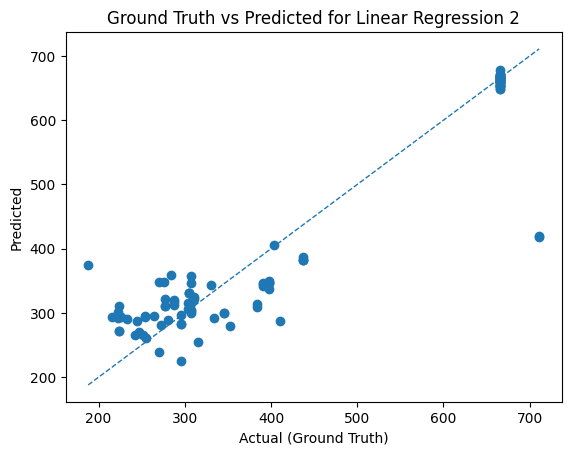

In [409]:
fig, ax = plt.subplots()
ax.scatter(y_test2, y_pred2)
ax.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], '--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted for Linear Regression 2")
plt.show()

In [410]:
linear_comp = pd.DataFrame({'Actual TAX': y_test2, 'Predicted TAX': y_pred2[:len(y_test2)]})
linear_comp.head(20)

,Actual TAX,Predicted TAX
173,296.00000,282.09602
274,254.00000,293.96574
491,711.00000,417.77988
72,305.00000,330.36571
452,666.00000,665.60970
76,398.00000,338.01725
316,304.00000,315.84890
140,437.00000,386.89665
471,666.00000,649.28661
500,391.00000,341.22830


### Observation

This linear regression model produces a much higher r2 score compared to the first two models. However, we see that the mean squared errors and the mean absolute errors are huge. The graph demonstrates how many values are missed especially outliers that are completely not captured. Lastly, the dataframe shows us that while some predictions were very close, others are way off.

## Ridge, Lasso and Elastic Net Part 2

Let us see if these three regression models can improve our model's accuracy.

In [418]:
# create a second function to compute the different regressions
def run_reg2(regressor, random_state, alpha, x, y,x_test,y_test):
    # create a regression object and fit it
    model = regressor
    model.random_state=random_state
    model.alpha=alpha
    model.fit(x, y)
    y_pred = model.predict(x_test)
    
    # print the R-Squared scores and the errors
    reg_name = re.sub(r'\(.*\)', '', str(model))
    print(f"\033[1m{reg_name} Regression with Alpha Value of {model.alpha}\033[0m")
    training_score = f"Training R-Squared Score:"
    validation_score = f"Validation R-Squared Score:"
    test_score = f"Testing R-Squared Score:"
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    print(training_score, model.score(x, y)*100)
    print(validation_score, model.score(X_val2, y_val2)*100)
    print(test_score, model.score(x_test, y_test)*100)
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("----------------------------------------------")

In [419]:
for i in alpha_values:
    for r in regressions:
        run_reg2(r,42,i,X_train2, y_train2, X_test2, y_test2)

Ridge Regression with Alpha Value of 0.001
Training R-Squared Score: 86.8768499987031
Validation R-Squared Score: 89.9216365411749
Testing R-Squared Score: 88.6224577986609
Mean Squared Error: 3547.992630302203
Mean Absolute Error: 36.30779820551726
----------------------------------------------
Lasso Regression with Alpha Value of 0.001
Training R-Squared Score: 86.87684995258779
Validation R-Squared Score: 89.92170297380686
Testing R-Squared Score: 88.62242594122411
Mean Squared Error: 3548.002564780929
Mean Absolute Error: 36.30727573808533
----------------------------------------------
ElasticNet Regression with Alpha Value of 0.001
Training R-Squared Score: 86.87681770811328
Validation R-Squared Score: 89.92243442622453
Testing R-Squared Score: 88.62213368430322
Mean Squared Error: 3548.0937026895517
Mean Absolute Error: 36.33296209301426
----------------------------------------------
Ridge Regression with Alpha Value of 0.01
Training R-Squared Score: 86.87684986044289
Validation 

I am surprised to see that the ridge, lasso,  and the elastic net regressions did not perform much better than the linear regression. The metrics are still respectable but not as high as we would have liked. We saw that there are likely huge outliers in the data which makes it hard to predict. It will be interesting to see if the decision tree regression can account for these problems.

## Decision Tree Regression Part 2

In [432]:
dtr2 = DecisionTreeRegressor(random_state=42)

dtr2.fit(X_train2,y_train2)

# let's test the model by measuring our accuracy scores (r-squared) on the training and validation sets
print("Training R-Squared Score:", dtr2.score(X_train2, y_train2))
print("Validation R-Squared Score:", dtr2.score(X_val2, y_val2))
print("Max Depth Reached:", dtr2.get_depth())

Training R-Squared Score: 1.0
Validation R-Squared Score: 0.8911836220710165
Max Depth Reached: 14


Once again, the decision tree regression performed better than all the previous regressions. Same as we did before, let us tune the alpha value to see if we can improve R-squared.

In [435]:
for i in alpha_values:
    dtr3 = DecisionTreeRegressor(random_state=42, ccp_alpha=i)
    dtr3.fit(X_train2,y_train2)
    
    y_pred3 = dtr3.predict(X_test2)
    
    # print the R-Squared scores and the errors
    print(f"\033[1mDecision Tree Regression with Alpha Value of {dtr3.ccp_alpha}\033[0m")
    training_score = f"Training R-Squared Score:"
    validation_score = f"Validation R-Squared Score:"
    test_score = f"Testing R-Squared Score:"
    
    mse3 = mean_squared_error(y_test2, y_pred3)
    mae3 = mean_absolute_error(y_test2, y_pred3)
    
    print(training_score, dtr3.score(X_train2, y_train2)*100)
    print(validation_score, dtr3.score(X_val2, y_val2)*100)
    print(test_score, dtr3.score(X_test2, y_test2)*100)
    print("Mean Squared Error:", mse3)
    print("Mean Absolute Error:", mae3)
    print("Max Depth Reached:", dtr3.get_depth())
    print("----------------------------------------------")

Decision Tree Regression with Alpha Value of 0.001
Training R-Squared Score: 100.0
Validation R-Squared Score: 89.11836220710165
Testing R-Squared Score: 94.29719539060876
Mean Squared Error: 1778.3725490196077
Mean Absolute Error: 15.313725490196079
Max Depth Reached: 14
----------------------------------------------
Decision Tree Regression with Alpha Value of 0.01
Training R-Squared Score: 99.99998181516038
Validation R-Squared Score: 89.11833608573771
Testing R-Squared Score: 94.2971934256855
Mean Squared Error: 1778.3731617647059
Mean Absolute Error: 15.316176470588236
Max Depth Reached: 14
----------------------------------------------
Decision Tree Regression with Alpha Value of 0.1
Training R-Squared Score: 99.998963983709
Validation R-Squared Score: 89.13511935152106
Testing R-Squared Score: 94.28914273626248
Mean Squared Error: 1780.8837028144592
Mean Absolute Error: 15.386928104575164
Max Depth Reached: 13
----------------------------------------------
Decision Tree Regressi

As we suspected, the decision tree regression was able to reach an even higher accuracy than we've seen before. The error values are also lower than before but still somewhat high. The large distribution in our Y might explain this.

I am not quite sure why the testing R-squared score is higher than the validation but it could have something to do with the way the split was done. It could also just be random.

We will now graph and review the highest scoring tree's prediction and look at most important features.

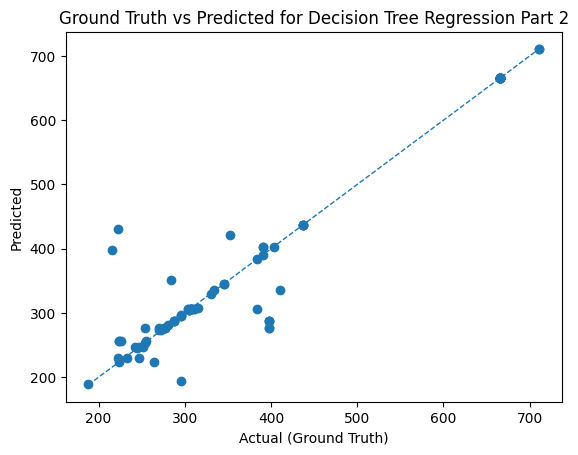

In [437]:
# graph the highest scoring tree's predictions

dtr4 = DecisionTreeRegressor(random_state=42, ccp_alpha=0.5)
dtr4.fit(X_train2,y_train2)
    
y_pred4 = dtr4.predict(X_test2)

fig, ax = plt.subplots()
ax.scatter(y_test2, y_pred4)
ax.plot([min(y_test2), max(y_test2)], [min(y_test2), max(y_test2)], '--', lw=1)
ax.set_xlabel('Actual (Ground Truth)')
ax.set_ylabel('Predicted')
ax.set_title("Ground Truth vs Predicted for Decision Tree Regression Part 2")
plt.show()

In [438]:
dtr_pred2 = pd.DataFrame({'Actual TAX': y_test2, 'Predicted TAX': y_pred4[:len(y_test2)]})
dtr_pred2.head(20)

,Actual TAX,Predicted TAX
173,296.00000,296.00000
274,254.00000,254.00000
491,711.00000,711.00000
72,305.00000,305.00000
452,666.00000,666.00000
76,398.00000,276.20000
316,304.00000,306.86111
140,437.00000,437.00000
471,666.00000,666.00000
500,391.00000,403.00000


In [439]:
# create a dataframe for the most important features and sort it
dtr_features2 = pd.DataFrame(data=[dtr4.feature_importances_],columns=corr_features)
dtr_features2 = dtr_features2.T
dtr_features2.sort_values(by=0,ascending=False,inplace=True)
dtr_features2

,0
RAD,0.82959
INDUS,0.06665
NOX,0.06623
DIS,0.02067
CRIM,0.01123
AGE,0.00323
LSTAT,0.00241


### Observation

Wow! It is incredible how efficient and effective decision trees are. We see that the highest performing tree optimized by putting the highest importance on the features most correlated with TAX. In our predictions vs true values snippet, we saw most of the values matched perfectly. Similarly, the graph shows most of the data points clustering around or on the regression line. There are only a few outliers that are not very close to the line which make up our errors. If we had removed outliers, we could've likely produced an even higher accuracy.

# Summary

This concludes our exploration of the Boston Housing dataset. It was exciting working with a real-life dataset that is also extremely clean. The features had very different distributions so scaling needed to be applied in order to give equal weight to each feature.

While we only chose two variables to test our regressions against, it was fascinating to see that MEDV could not be predicted accurately by the other features. Taking correlations into account, most of the features were not correlated highly with MEDV. This would explain the results that we saw. Even more astounding is that applying the different regression models did not improve upon the linear regression's accuracy, aside from the decision tree regression. This likely points to the other features being poor predictors of MEDV. Moreover, some of the models, such as the Lasso regression, do not handle multicollinearity well. Based on our correlation matrix, we know that several features within our X correlate strongly with each other. Lasso may disregard one of them, thus eliminating a feature that could be important. 

Overall, I believe that the other features were just poor predictors of MEDV. This contrasts with what I would have assumed without seeing the data. When I attempted to re-run the linear regression using a subset of all the features that correlate better with MEDV, the results were even worse than using all the features. Decision tree regressions performed the best for both of the target variables that I used. This analysis showed their flexibility and effectiveness. They are prone to overfitting but I am not too concerned about it for this assignment.

I was worried that my analysis with MEDV was flawed. However, when I did my analysis again using TAX, I saw much higher scores. This makes sense as TAX correlates well with many more features than MEDV. Furthermore, TAX has an extremely high correlation with RAD. This is also not surprising because access to radial highways that lead to urban centers is consistent with higher property tax values. Urban centers tend to be more expensive so being close to them would surely raise property values.